# 1) Random Imputation

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

- first we will fill numerical values

In [150]:
df=pd.read_csv("train (2).csv",usecols=["Survived","Age","Fare"])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [151]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [152]:
x=df.drop(columns=["Survived"])
y=df["Survived"]

- so basically there null values in the age column

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [154]:
x_train.shape,y_train.shape

((712, 2), (712,))

In [155]:
x_train.head()

,Age,Fare
140,NaN,15.2458
439,31.0,10.5000
817,31.0,37.0042
378,20.0,4.0125
491,21.0,7.2500


In [156]:
x_train["Age_impute"]=x_train["Age"]
x_test["Age_impute"]=x_test["Age"]

In [157]:
x_train.head()

,Age,Fare,Age_impute
140,NaN,15.2458,NaN
439,31.0,10.5000,31.0
817,31.0,37.0042,31.0
378,20.0,4.0125,20.0
491,21.0,7.2500,21.0


- pandas chained indexing
- so basically here we want to fill values thats why we do pandas chained indexing means column ke andr se column values nikalna
- to fill this values we have to pass an array

In [158]:
x_train["Age_impute"][x_train["Age_impute"].isnull()]= x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

In [159]:
x_test["Age_impute"][x_test["Age_impute"].isnull()]=x_test["Age"].dropna().sample(x_test["Age"].isnull().sum()).values

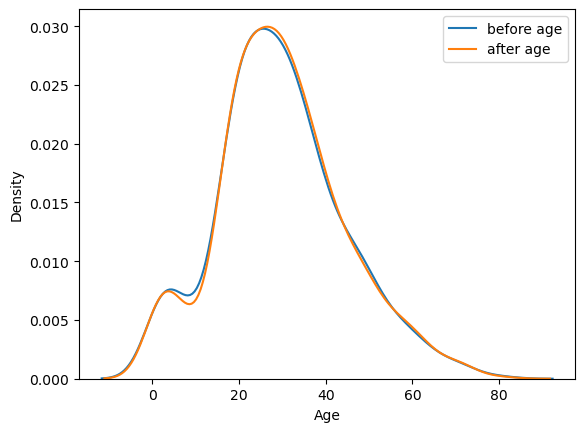

In [160]:
sns.kdeplot(x_train["Age"],label="before age")
sns.kdeplot(x_train["Age_impute"],label="after age")
plt.legend()
plt.show()

In [161]:
print("before var",x_train["Age"].var())
print("after var",x_train["Age_impute"].var())

before var 213.7165085187578
after var 211.19268721673106


<Axes: >

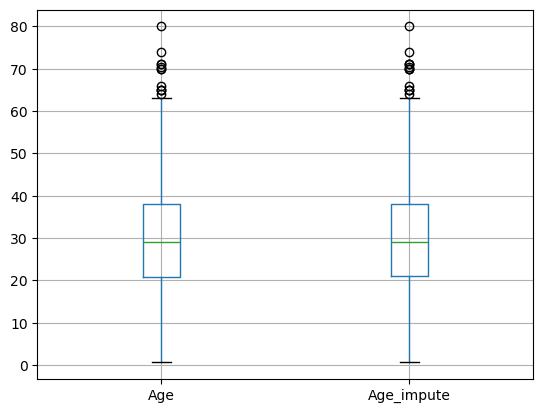

In [162]:
x_train[["Age","Age_impute"]].boxplot()

In [163]:
x_train.cov()

,Age,Fare,Age_impute
Age,213.716509,79.072379,213.716509
Fare,79.072379,2513.549265,67.047933
Age_impute,213.716509,67.047933,211.192687


In [164]:
# sampled_value = x_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

- so while production we have to give the same value for the model like if fare=50 then the age should be 20 like this

- now we will see for categorical column

In [165]:
df=pd.read_csv("train (1).csv",usecols=['GarageQual','FireplaceQu', 'SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [166]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [167]:
x=df
y=df["SalePrice"]

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [169]:
x_train.shape,x_test.shape

((1168, 3), (292, 3))

In [170]:
x_train["FireplaceQu_impute"]=x_train["FireplaceQu"]
x_test["FireplaceQu_impute"]=x_test["FireplaceQu"]

x_train["GarageQual_impute"]=x_train["GarageQual"]
x_test["GarageQual_impute"]=x_test["GarageQual"]

In [171]:
x_train.head()

,FireplaceQu,GarageQual,SalePrice,FireplaceQu_impute,GarageQual_impute
618,Gd,TA,314813,Gd,TA
870,NaN,TA,109500,NaN,TA
92,NaN,TA,163500,NaN,TA
817,Gd,TA,271000,Gd,TA
302,TA,TA,205000,TA,TA


In [172]:
x_train["FireplaceQu_impute"][x_train["FireplaceQu_impute"].isnull()]=x_train["FireplaceQu"].dropna().sample(x_train["FireplaceQu"].isnull().sum()).values
x_test["FireplaceQu_impute"][x_test["FireplaceQu_impute"].isnull()]=x_test["FireplaceQu"].dropna().sample(x_test["FireplaceQu"].isnull().sum()).values

x_train["GarageQual_impute"][x_train["GarageQual_impute"].isnull()]=x_train["GarageQual"].dropna().sample(x_train["GarageQual"].isnull().sum()).values
x_test["GarageQual_impute"][x_test["GarageQual_impute"].isnull()]=x_test["GarageQual"].dropna().sample(x_test["GarageQual"].isnull().sum()).values

In [173]:
gf=pd.concat([
    x_train["FireplaceQu"].value_counts()/len(x_train["FireplaceQu"].dropna()),
    x_train["FireplaceQu_impute"].value_counts()/len(x_train)
],axis=1)
gf.columns=["original","imputed"]

In [174]:
gf

,original,imputed
Gd,0.478120,0.476027
TA,0.416532,0.417808
Fa,0.047002,0.047945
Ex,0.030794,0.030822
Po,0.027553,0.027397


In [175]:
pf=pd.concat([
    x_train["GarageQual"].value_counts()/len(x_train["GarageQual"].dropna()),
    x_train["GarageQual_impute"].value_counts()/len(x_train)
],axis=1)
pf.columns=["original","imputed"]

In [176]:
pf

,original,imputed
TA,0.950450,0.952055
Fa,0.036036,0.035103
Gd,0.009009,0.008562
Po,0.002703,0.002568
Ex,0.001802,0.001712


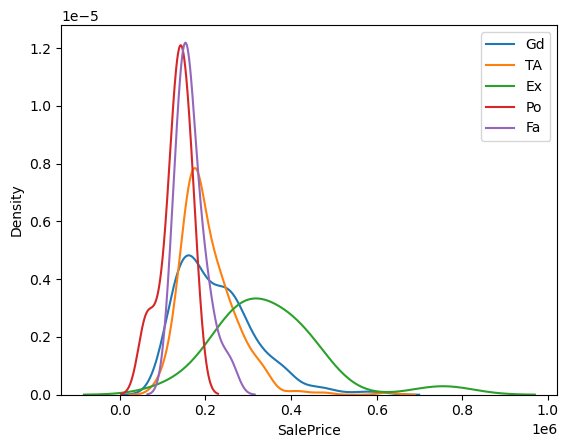

In [177]:
for category in x_train["FireplaceQu"].dropna().unique():
    sns.kdeplot(x_train[x_train["FireplaceQu"]== category]["SalePrice"],label=category)
    plt.legend()

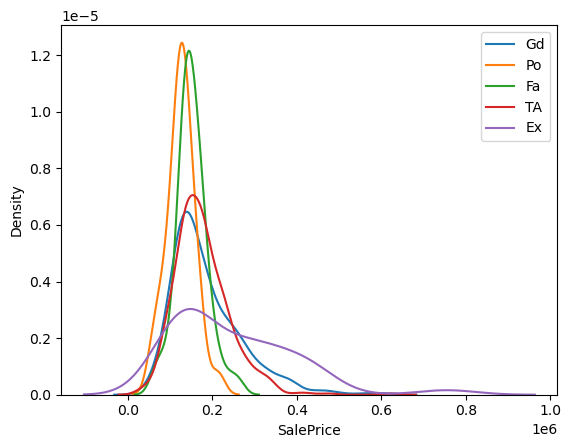

In [178]:
for category in x_train["FireplaceQu_impute"].dropna().unique():
    sns.kdeplot(x_train[x_train["FireplaceQu_impute"]== category]["SalePrice"],label=category)
    plt.legend()

# 2) Missing Indicator

In [179]:
import pandas  as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer,MissingIndicator

In [180]:
df=pd.read_csv("train.csv",usecols=["Survived","Age","Fare"])

- so basically we will train the model without missing indicator and see the accuracy

In [181]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [182]:
x=df.drop(columns=["Survived"])
y=df["Survived"]

In [183]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [184]:
x_train.shape

(712, 2)

In [185]:
y_train.shape

(712,)

In [186]:
st=SimpleImputer()
st.fit(x_train)

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [187]:
x_train_fill=st.transform(x_train)
x_test_fill=st.transform(x_test)
x_train_fill

array([[29.74518389, 15.2458    ],
       [31.        , 10.5       ],
       [31.        , 37.0042    ],
       ...,
       [29.74518389,  7.7333    ],
       [36.        , 17.4       ],
       [60.        , 39.        ]], shape=(712, 2))

In [188]:
from sklearn.linear_model import LogisticRegression

In [189]:
lt=LogisticRegression()
lt.fit(x_train_fill,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [190]:
y_pred=lt.predict(x_test_fill)

In [191]:
from sklearn.metrics import accuracy_score

In [192]:
print("accuracy",accuracy_score(y_test,y_pred))

accuracy 0.6983240223463687


- so now  we will do missing indicator and check the accuracy it increase or not

In [193]:
mi=MissingIndicator()
mi.fit(x_train)

,missing_values,nan
,features,'missing-only'
,sparse,'auto'
,error_on_new,True


- so basically when we do this missing indicator then the colun which have missing values it will be tranform to true and false values then we will make it as a new column and filll the age values because of this the model will know which are null values that er fill

In [194]:
x_train_trf=mi.transform(x_train)
x_test_trf=mi.transform(x_test)

In [195]:
x_train["Age_fill"]=x_train_trf
x_test["Age_fill"]=x_test_trf

In [196]:
x_train.head()

,Age,Fare,Age_fill
140,NaN,15.2458,True
439,31.0,10.5000,False
817,31.0,37.0042,False
378,20.0,4.0125,False
491,21.0,7.2500,False


In [197]:
st=SimpleImputer()
st.fit(x_train)

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [198]:
x_train_transform=st.transform(x_train)
x_test_transform=st.transform(x_test)

In [199]:
x_train_transform

array([[29.74518389, 15.2458    ,  1.        ],
       [31.        , 10.5       ,  0.        ],
       [31.        , 37.0042    ,  0.        ],
       ...,
       [29.74518389,  7.7333    ,  1.        ],
       [36.        , 17.4       ,  0.        ],
       [60.        , 39.        ,  0.        ]], shape=(712, 3))

In [200]:
clf=LogisticRegression()
clf.fit(x_train_transform,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [201]:
y_pred=clf.predict(x_test_transform)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0])

In [202]:
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.6871508379888268
